# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

refences [1](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/) [2](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="800" height="600" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains 22,500 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 2,500 images, named according to a numeric id. 

## Grading = 20 Marks

## Setup Steps

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

def setup():
   ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data.zip")
   ipython.magic("sx unzip -qq Cat_Dog_data.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially. 

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms, models
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

## **Stage 1:** Define Transformations and import data

### 2 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [ ]:
image_size = (128,128)

# YOUR CODE HERE for defining Transformation for an image
transformations = transforms.Compose([transforms.Resize(image_size),
                               transforms.Grayscale(num_output_channels=1),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

### 1 Mark -> Load the dataset with the defined transformations
 
PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
batch_size = 100 

train_set = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = transformations)
print(len(train_set))
# YOUR CODE HERE for the DataLoader
trainloader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=batch_size)
print(len(trainloader))


22500
225


### 2 Marks -> Plot the 5 images of Cats and 5 images of Dogs

In [ ]:
# YOUR CODE HERE for plotting the images
for (X_train, y_train) in trainloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([100, 1, 128, 128]) type: torch.FloatTensor
y_train: torch.Size([100]) type: torch.LongTensor


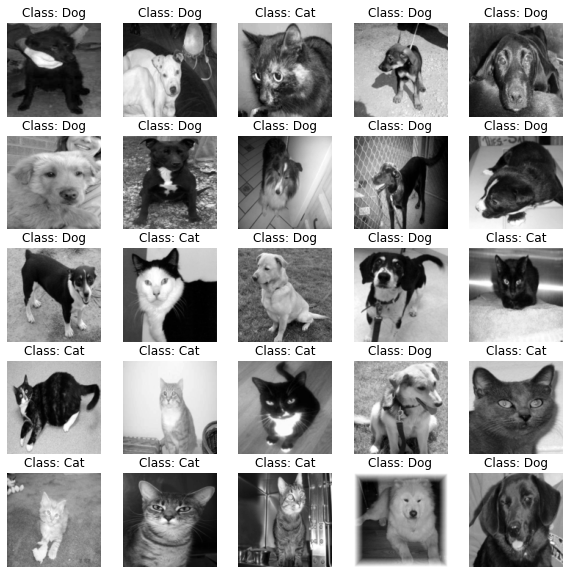

In [ ]:
labels_map = {0 : 'Cat', 1 : 'Dog'};
pltsize=1
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    # Convert the tensor to numpy for displaying the image
    plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
    plt.title('Class: '+labels_map[int(str(y_train[i])[-2])])

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)



### 5 Marks -> Create CNN Model


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
     # YOUR CODE HERE for defining more number of Convolutional layers with Maxpool as required (Hint: Use at least 3 convolutional layers for better performance)
  
        # Defining first convolution layer with input_channels = 1, output_channels = 8, kernel_size = 3
        self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 8, kernel_size= 3, padding=1) 
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(8)
        # Defining second convolution layer with input_channels = 8, output_channels = 16, kernel_size = 3               
        self.conv2 = nn.Conv2d(in_channels= 8, out_channels= 16, kernel_size= 3, padding =1)
        # Batch normalization
        self.bn2 = nn.BatchNorm2d(16)
        # Defining second convolution layer with input_channels = 8, output_channels = 16, kernel_size = 3               
        self.conv3 = nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size= 5, padding =1) #64, 16, 7, 7
        # Batch normalization
        self.bn3 = nn.BatchNorm2d(32)


        
      # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax

        # 784 input features, 256 output features 
        self.fc1 = nn.Linear(15*15*32, 126) # 100, 32, 15, 15 #64, 32, 2, 2
        # 256 input features, 128 output features 
        self.fc2 = nn.Linear(126, 126)
        # 128 input features, 64 output features 
        self.fc3 = nn.Linear(126, 64)
        # 64 input features, 10 output features for our 10 defined classes
        self.fc4 = nn.Linear(64, 10) 

        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2)  # Max pooling layer with filter size 2x2
        
    
    def forward(self, x):
        # Convolutional layers with ReLU activation and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.bn3(x)

        i = 0
        if i < 1:
            i +=1
            print(x.shape, 'output  size of bn3')
            



        # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector
        x = x.view(-1, 15*15*32)  # Output shape of convolutional layer is 16*7*7 


        
        # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer
        
        # Linear layers with RELU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.softmax(x, dim=1)
      

### 1 Mark -> Create an instance of the model and Declare the loss function and optimizer


In [ ]:
# To run the training on GPU
print(torch.cuda.is_available())

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [ ]:
model = CNNModel()
model = model.to(device)
print(model)



CNNModel(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=7200, out_features=126, bias=True)
  (fc2): Linear(in_features=126, out_features=126, bias=True)
  (fc3): Linear(in_features=126, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [ ]:
lr = 0.01

In [ ]:
criterion = nn.BCELoss() # YOUR CODE HERE : Explore and declare loss function

optimizer = optim.SGD(model.parameters(), lr = lr) # YOUR CODE HERE : Explore on the optimizer and define with the learning rate


## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

### Expected training accuracy is above 90%

### 5 Marks -> Iterate over images in the train_loader and perform the following steps. 

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model. Convert the data to GPU before passing data  to the model

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)

In [ ]:
# YOUR CODE HERE. This will take time

# No of Epochs
epoch = 1

# keeping the network in train mode
model.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in trainloader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      print(images.shape)
      labels = labels.to(device)
      print(labels.shape)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = model(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(trainset))
    train_accuracy.append(100 * correct/len(trainset))

    # Record loss and accuracy of the train dataset
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))



torch.Size([100, 1, 128, 128])
torch.Size([100])
torch.Size([100, 32, 15, 15]) output  size of bn3


ValueError: ignored

## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 90%

### 4 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count of the correct labels

5. Calculate the accuracy based on the count of correct labels

In [ ]:
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = transformations)

# YOUR CODE HERE for the DataLoader
testloader = torch.utils.data.DataLoader(val_set, shuffle=False, batch_size=batch_size)

In [ ]:
model.eval()
# YOUR CODE HERE for calculating the accuracy